In [1]:
import torch, torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

In [2]:
dataset = MNIST(root='data',train=True,download=True,transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8294153.07it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3386705.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2969883.89it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2111329.80it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_data = MNIST(root='data', train=False, transform=transforms.ToTensor())

In [5]:
len(test_data)

10000

In [6]:
from torch.utils.data import random_split

train_ds, val_da = random_split(dataset,[50000,10000])

In [7]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle= True)
val_loader = DataLoader(val_da, batch_size, shuffle= False)
test_loader = DataLoader(test_data, batch_size, shuffle= False)

In [8]:
import torch.nn as nn

In [33]:
class Model(nn.Module):
    def __init__(self):

        super(Model, self).__init__()
        self.network = nn.Sequential(

            # - x 1 x 28 x 28
            nn.Conv2d(1, 16, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            # - x 16 x 14 x 14
            nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            # - x 32 x 7 x 7

            nn.Flatten(),
            nn.Linear(32*7*7,256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.network(x)
        return x


In [39]:
model = Model()

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimiser= torch.optim.SGD(model.parameters(), lr=0.001)

In [36]:
def correct(outputs, labels):
  _, preds= torch.max(outputs, dim=1)
  return torch.sum(preds==labels).item()

def evaluate(model, val_loader):
  sum = 0
  model.eval()
  for batch in val_loader:
    xb, labels = batch
    outputs= model(xb)
    sum= sum + correct(outputs,labels)

  return sum

In [37]:
correct_pred = evaluate(model, test_loader)
print("accuracy on test data:", correct_pred/10000)

accuracy on test data: 0.0979


In [41]:
num_epochs= 3

for epoch in range(num_epochs):
  model.train()
  for batch in train_loader:
    xb, labels = batch
    outputs= model(xb)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimiser.step()
    optimiser.zero_grad
  correct_preds = evaluate(model, val_loader)
  print("epoch:", epoch, "val_accuracy:", correct_preds/10000)

epoch: 0 val_accuracy: 0.8879
epoch: 1 val_accuracy: 0.9298
epoch: 2 val_accuracy: 0.9471


In [42]:
correct_pred = evaluate(model, test_loader)
print("accuracy on test data:", correct_pred/10000)

accuracy on test data: 0.9534


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def show(img,pred,label):
  img = img.reshape(28,28,-1)
  plt.imshow(img,cmap="gray")
  print("Label:",label,"Prediction:",pred)

In [45]:
for batch in test_loader:
    xb, labels = batch
    outputs= model(xb)
    _, preds= torch.max(outputs, dim=1)
    wrong_preds_img = xb[preds!=labels]
    wrong_preds_pred = preds[preds!=labels]
    wrong_preds_labels = labels[preds!=labels]
    break


Label: tensor(3) Prediction: tensor(8)


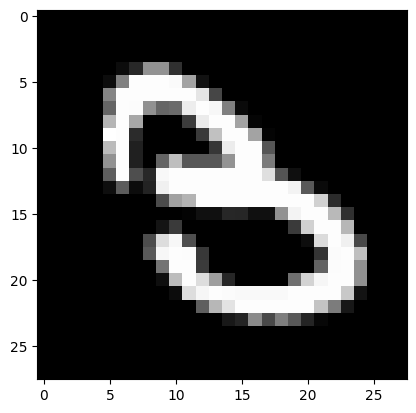

In [46]:
show(wrong_preds_img[0],wrong_preds_pred[0],wrong_preds_labels[0])

Label: tensor(9) Prediction: tensor(7)


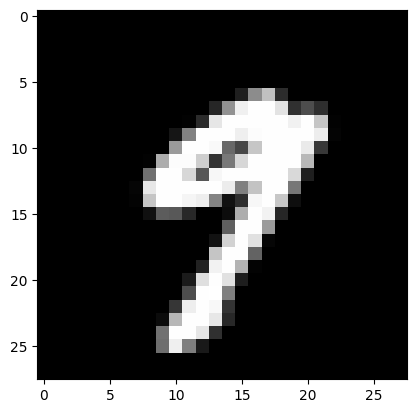

In [47]:
show(wrong_preds_img[1],wrong_preds_pred[1],wrong_preds_labels[1])

Label: tensor(9) Prediction: tensor(5)


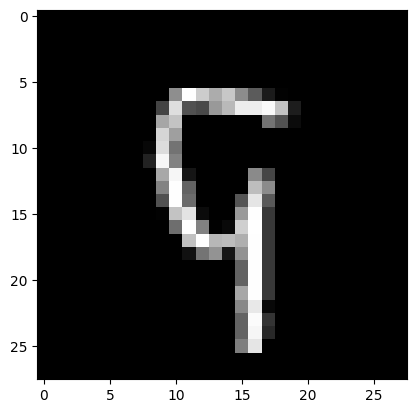

In [48]:
show(wrong_preds_img[2],wrong_preds_pred[2],wrong_preds_labels[2])

Label: tensor(0) Prediction: tensor(9)


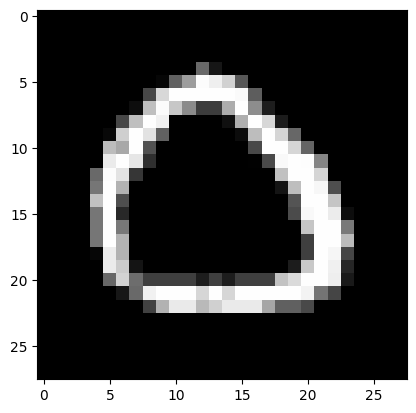

In [49]:
show(wrong_preds_img[3],wrong_preds_pred[3],wrong_preds_labels[3])